# ACI Assignment 2

## Question 6 – C-section data Processing for decision making

#### Dataset link - https://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset

#### Importing necesarry libraries

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as scores

from pomegranate import *

warnings.filterwarnings("ignore")
%matplotlib inline

#### Loading data through csv file and checking basic information about it

In [2]:
filename="caesarian.csv"

data = pd.read_csv(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                80 non-null     int64
 1   Delivery number    80 non-null     int64
 2   Delivery time      80 non-null     int64
 3   Blood of Pressure  80 non-null     int64
 4   Heart Problem      80 non-null     int64
 5   Caesarian          80 non-null     int64
dtypes: int64(6)
memory usage: 3.9 KB


In [3]:
data.describe()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.637500,1.000000,0.375000,0.575000
std,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


In [4]:
data.head(10)

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
5,26,1,1,0,0,0
6,27,2,0,1,0,0
7,32,3,0,1,0,1
8,28,2,0,1,0,0
9,27,1,1,1,0,1


## Question 1: Python

### 1.	Construct a Bayesian Belief Network for the given data.

#### Creating Bayesian Belief Network using 'exact' algorithm which uses DP/A* to find the optimal Bayesian network

In [5]:
model = BayesianNetwork.from_samples(data, algorithm='exact')

### 2. Predict the probability of  a patient having the following properties : Age is 22,first delivery with delivery time 2 and with no heart problem or blood pressure and having normal delivery.

In [6]:
print(f"The probabilty is {model.probability([[22,1,2,1,0,0]])}.")

The probabilty is 0.0009529296874999997.


### 3. Predict the type of delivery for the lady with the following characteristics: Age is 26, admitted for second delivery with time of delivery 0, having blood pressure and no heart problem.

In [7]:
print(f"{model.predict([[26,2,0,2,0,None]])}")

[array([26, 2, 0, 2, 0, 0], dtype=object)]


#### Since the prediction is coming out as '0', hence the class value will be "No" which means normal delivery.

### 4. Infer the probability for the data: Age: 36, 4th delivery, with time of delivery 1 and has blood pressure and no heart problem to have normal delivery.

In [8]:
print(f"The probabilty is {model.probability([[36,4,1,2,0,0]])}.")

The probabilty is 1.7431640625000008e-05.


## Question 2: Decision Tree and Prolog

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                80 non-null     int64
 1   Delivery number    80 non-null     int64
 2   Delivery time      80 non-null     int64
 3   Blood of Pressure  80 non-null     int64
 4   Heart Problem      80 non-null     int64
 5   Caesarian          80 non-null     int64
dtypes: int64(6)
memory usage: 3.9 KB





#### From .info() method and below code, we can see that there are no null or missing values in the data set and since the data set is small consisting of about 80 rows, we will not be checking duplicate values

#### Checking for categorical variables in the dataset

In [10]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :\n', categorical)

There are 0 categorical variables
The categorical variables are :
 []


#### Checking for numerical variables in the dataset

In [11]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables
The numerical variables are : ['Age', 'Delivery number', 'Delivery time', 'Blood of Pressure', 'Heart Problem', 'Caesarian']


#### Checking distribution of each variable value

In [12]:
for var in numerical:
    print(f"For numerical feature - {var}, value counts are :")
    print(data[var].value_counts())
    print()

For numerical feature - Age, value counts are :
26    10
32     8
25     7
27     7
29     6
28     6
33     5
22     4
20     3
30     3
31     3
36     3
24     2
21     2
18     2
19     2
35     2
38     1
37     1
17     1
23     1
40     1
Name: Age, dtype: int64

For numerical feature - Delivery number, value counts are :
1    41
2    27
3    10
4     2
Name: Delivery number, dtype: int64

For numerical feature - Delivery time, value counts are :
0    46
1    17
2    17
Name: Delivery time, dtype: int64

For numerical feature - Blood of Pressure, value counts are :
1    40
0    20
2    20
Name: Blood of Pressure, dtype: int64

For numerical feature - Heart Problem, value counts are :
0    50
1    30
Name: Heart Problem, dtype: int64

For numerical feature - Caesarian, value counts are :
1    46
0    34
Name: Caesarian, dtype: int64



In [13]:
# data["Blood of Pressure"] = data["Blood of Pressure"].replace(to_replace="low",value="Low")
# data["Caesarian"] = data["Caesarian"].replace(to_replace="yes",value="Yes")
# data["Caesarian"].replace(to_replace=["Yes","No"],value=[1,0],inplace=True)

In [14]:
#dataset = pd.get_dummies(data)

In [15]:
# Printing data frame to get a glimpse of it
data

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
...,...,...,...,...,...,...
75,27,2,1,1,0,0
76,33,4,0,1,0,1
77,29,2,1,2,0,1
78,25,1,2,0,0,1


In [16]:
# Deriving X and y to feed into our decision tree algorithm

X = data.drop(['Caesarian'],axis=1)
y = data[['Caesarian']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101,stratify=y)

#### Building decision tree using gini index as criteria and limiting max depth to 3 

In [18]:
classifier = DecisionTreeClassifier(criterion = 'gini', random_state=0, max_depth = 3)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
score=scores(y_test,y_pred,average="weighted")
acc = classifier.score(X_test,y_test)
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(acc)
4
print(report)

print(cm)

0.6875
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.70      0.78      0.74         9

    accuracy                           0.69        16
   macro avg       0.68      0.67      0.68        16
weighted avg       0.69      0.69      0.68        16

[[4 3]
 [2 7]]


#### Visualising decision tree

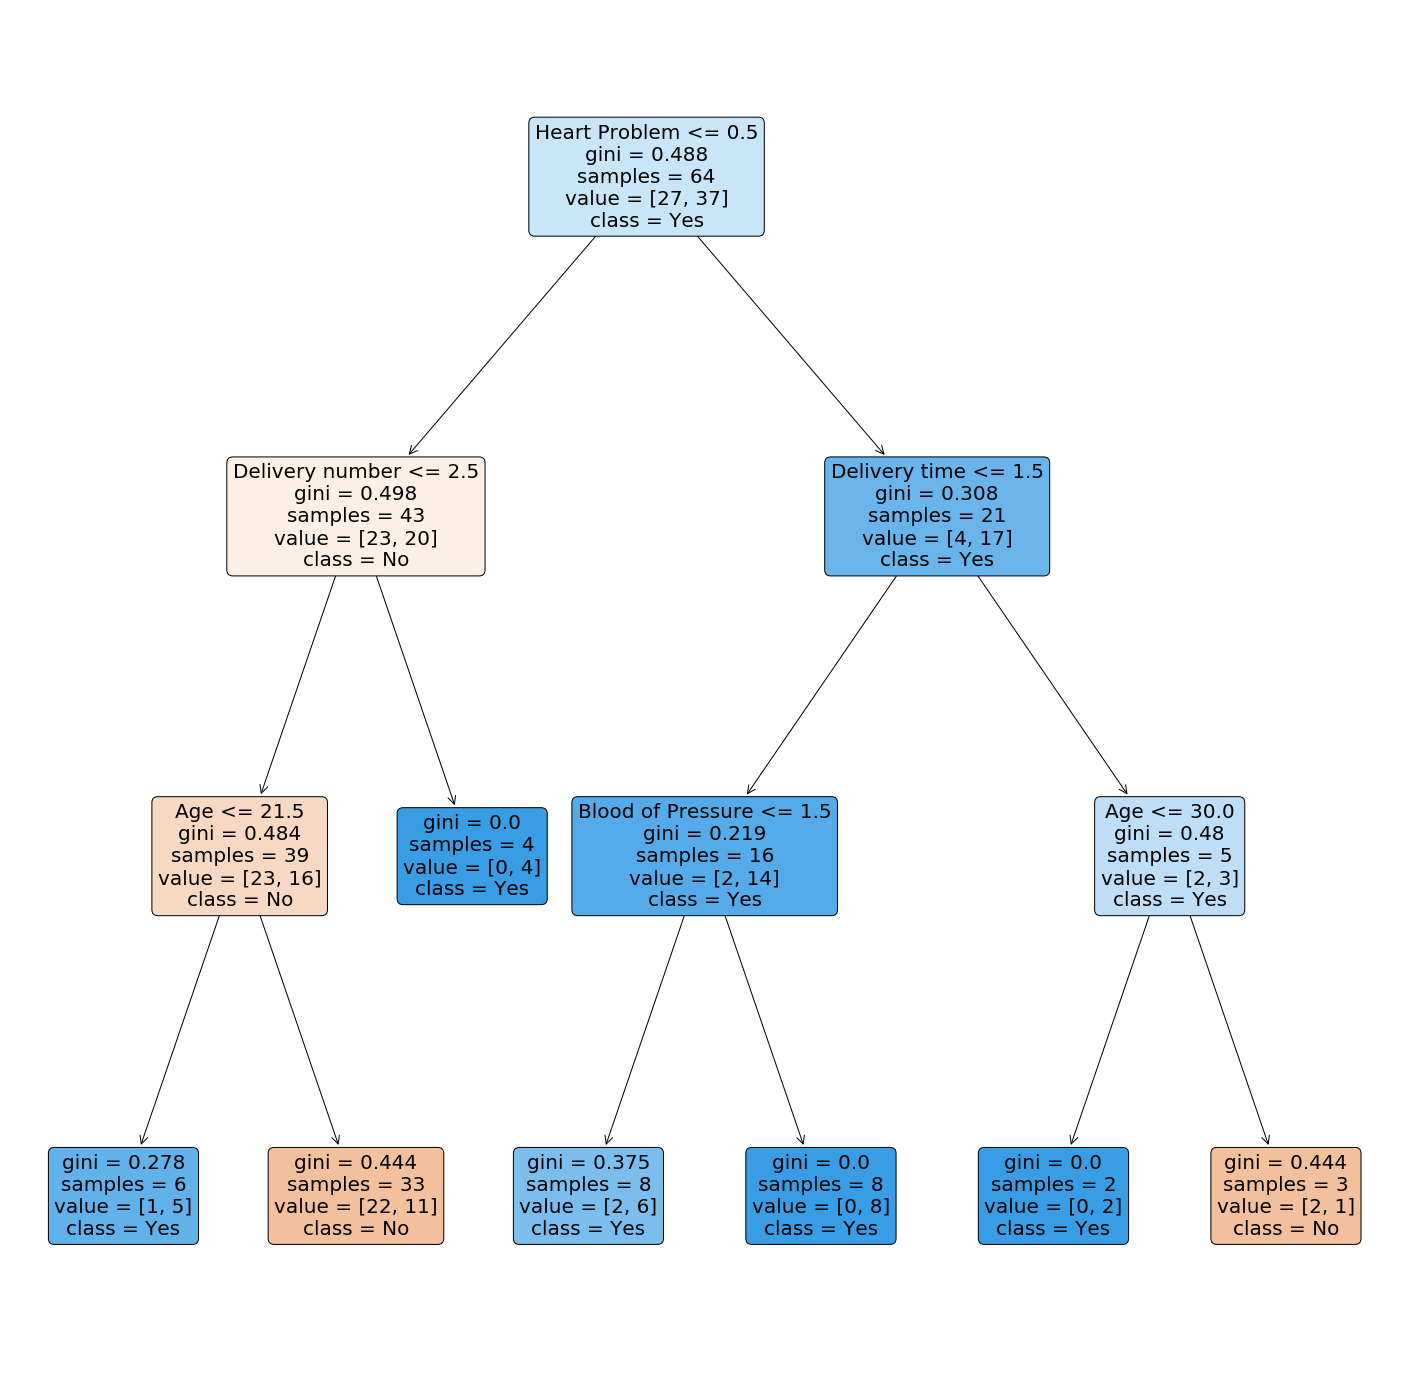

In [19]:
import pydotplus
from sklearn import tree
from sklearn. tree import export_graphviz
from IPython.display import Image

plt.figure(figsize=(25,25))  # set plot size (denoted in inches)
tree.plot_tree(classifier,feature_names = list(X.columns),filled=True,rounded=True,fontsize=20,class_names=["No","Yes"])
plt.show()

#### Getting rules in the form of if-else statements

In [20]:
import numpy as np
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] 
                    if i != _tree.TREE_UNDEFINED else "undefined!" 
                    for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, np.argmax(tree_.value[node])))

    recurse(0, 1)

In [21]:
features = list(data.columns)
tree_to_code(classifier,features)

def tree(Age, Delivery number, Delivery time, Blood of Pressure, Heart Problem, Caesarian):
    if Heart Problem <= 0.5:
        if Delivery number <= 2.5:
            if Age <= 21.5:
                return 1
            else:  # if Age > 21.5
                return 0
        else:  # if Delivery number > 2.5
            return 1
    else:  # if Heart Problem > 0.5
        if Delivery time <= 1.5:
            if Blood of Pressure <= 1.5:
                return 1
            else:  # if Blood of Pressure > 1.5
                return 1
        else:  # if Delivery time > 1.5
            if Age <= 30.0:
                return 1
            else:  # if Age > 30.0
                return 0
